# Livrable 2: 

<br>

**Groupe 4 : Anthony EBERHARD, Osman CEKIC, Johann CORNELIUS, Arthur LAMBERT, Oscar PALISSOT**

<br>

## Rappel du contexte :
L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Vous faites partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Vous avez décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, vous hésitez à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.

<br>

## Définition du problème :

Nous avons à notre disposition une flotte de camions de livraison qui ont pour mission de livrer tous les colis. Les colis sont stockés dans notre entrepot qui sert de point de départ à nos camions. Les camions doivent livrer tous les colis en passant par tous les points de livraisons avant de rentrer à l'entrepot. Nous devons prendre en compte l'évolution du traffic sur les différents itinéraires.

<br>


## Modélisation du problème : 

Pour modéliser notre probleme nous avons fait le choix d'utiliser un graphe orienté. Les sommets du graphe représentent les points de livraisons et les arêtes, les itinéraires possibles entre chaque point de livraison. Les poids des arêtes représentent le temps de parcours entre chaque point de livraison. Le graphe sera évidemment connexe.

<br>

Exemple de graphe pondéré :

<br>

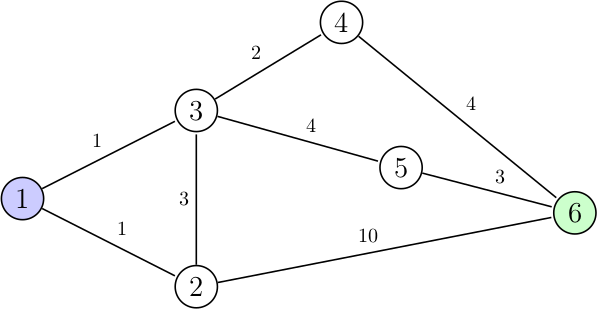

<br>

Afin de stocker et manipuler le graphe dans notre algorithme, nous allons faire appel à une matrice d'adjacence. La matrice d'adjacence permet de représenter les sommets voisins du graphe ainsi que leur pondération.

<br>

Exemple d'une matrice d'adjacence d'un graphe pondéré :

<br>

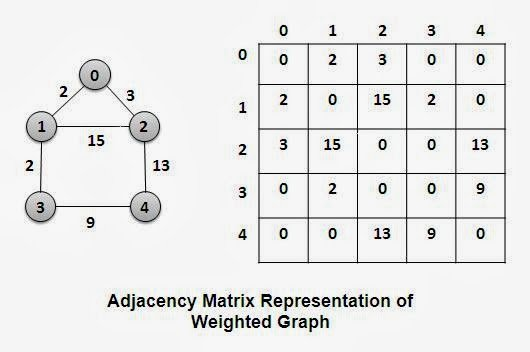

<br>

## Complexité du problème :

Notre problème s'apparente au problème de la chaine hamiltonienne avec quelques contraintes supplémentaires. Un chaine hamiltonienne est une chaine qui passe une et une seule fois par chacun des sommets d’un graphe non orienté. 
Le problème de la chaine hamiltonienne fait partie de l'ensemble $np$ . C'est-à-dire qu'il n'existe pas de solution polynomiale connu pour le résoudre.

<br>

Nous pouvons même approfondir en affirmant que le problème de la chaine hamiltonienne appartient à l'ensemble $np-complet$. **_cf corbeille d'exercice du prosit 2_**.

<br>

C'est-à-dire :

<ul>
    <li>il est possible de vérifier une solution en temps polynomial; la vérification appartient à l'ensemble $p$</li>
    <li>tous les problèmes de la classe $np$ se ramènent à celui-ci via une réduction polynomiale ; cela signifie que le problème est au moins aussi difficile que tous les autres problèmes de la classe $np$.</li>
</ul>

Or, comme dit précedemment, notre problème de livraison s'apparente à un problème de chaine hamiltonienne tout en y ajoutant des contraintes suplémentaires.

Pour la compléxité de notre problème nous avons donc :
$$O()_{chaineHamiltonienne} < O()_{livraison} $$

Nous pouvons donc affirmer que notre problème appartient à l'ensemble $np-complet$ et qu'il n'existe aucune solution en temps polynomial.

## Définitions des variables :


- $n$ le nombre de villes
- $N$ est l'ensemble des villes, avec $N=\{1,2,...,n\}$
- $p$ le nombre de véhicules
- $v$ est un véhicule particulier
- $V$ est l'ensemble des véhicules, avec $N=\{1,2,...,p\}$
- $R$ est l'ensemble des routes, avec $R\{(i,j)\in N^2 : i\neq j\}$
- $c_{ij}$ est le coût du trajet qui emprunte la route $(i,j)\in R$
- $Q$ est la capacité du véhicule
- $q$ est le volume de colis à livrer à la ville $i\in N$


<br>

La variable binaire prend la valeur $1$ si l'arète qui relie le sommet $i$ et $j$ si l'arète fait fait partie de l'itinéraire optimal et est empruntée par le véhicule $k$.

$$x_{ijk} \in \left\{ 0,1 \right\} \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$
<br>

Nous notons qu'un véhicule ne peut pas réaliser un trajet d'un sommet au même sommet.
<br>

$$x_{ijk} \in 0 \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$

<br>

## Fonction objectif : 

<br>

La fonction objectif minimise le coût des trajets de la tournée. Le coût n'est pas exprimé ici dans une unité particulière. Il est calculé à partir des poids du graphe pondéré représentant nos villes. Le coût peut être interprété comme la distance en km, le temps de trajet en minute, le coût de carburant en euro... Dans tous les cas, plus il est bas, plus la tournée est optimale.
$$Min \sum_{v=1}^{p} \sum_{i=0}^{n} \sum_{j=0,\; i\neq j}^{n} c_{ij}x_{ijv}$$

<br>

## Contraintes : 

Plusieurs contraintes se dégagent de ce problème.

<br>
<ul>
    <li>Les camions ont un point de départ : l'entrepot.</li>
    <br>
    $$ \sum_{j=2}^{n} x_{ijv} = 1 \;\;\; \forall v \in \{1,...,p\}$$
    <br>
    <li>Une ville ne peut pas être visité par 2 véhicules dans la même tournée.</li>
    <br>
    $$ \sum_{v=1}^{p} \sum_{i=1}^{n} x_{ijk} = 1 \;\;\; \forall j \in \{2,...,n\}$$
    <br>
    <li>Les véhicules quitte la ville dans laquelle il est arrivé. Après leur tournée, les camions doivent revenir à l'entrepot.</li>
    <br>
    $$ \sum_{i=1}^{n} x_{ijv} = \sum_{i=1}^{n} x_{jiv} \;\;\; \forall j \in \{1,...,n\}, \; v \in \{1,...,p\}$$
</ul>
<br>
<br>
Nous devons aussi sélectionner une contrainte à ajouter à notre périmètre d'étude afin d'apporter une réponse sérieuse à l'appel d'offre de l'ADEME.
Contrainte choisie :
<br>
<br>
<ul>
    <li>Les véhicules ont une capacité maximale.</li>
    <br>
    $$ \sum_{i = 1}^{n}\sum_{j = 2}^{n} q_{j}x_{ijv} \leq Q\;\;\; \forall v \in \{1,...,p\}$$
</ul>

<br>


- Notre solution doit être capable de résoudre le problème pour plusieurs milliers de points de livraison.
- Nous devons prendre en compte les évolutions du traffic en fonction des horaires
- Certains points de livraison n'ont pas d'itinéraire direct entres eux. Il faut donc passer par un point de livraison intermédiaire pour aller de l'un à l'autre.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import deque
import time
from functools import lru_cache

## Génération des élements : 
<br>
Avant de véritablement commencer la résolution du problème, il convient de générer les éléments de notre étude. Dans notre cas, des villes et des routes respectivement représentées par des points dans un repère et des segments reliants les villes connectées entre elles par une route.


In [3]:
#le nombre de villes
n = 50

#le nombre de colis
c = 100

#le nombre de véhicules
p = 10

# capacité max par camion
maxcapacity = 10

# utiliser un seed explicitement permettra de reproduire les conditions initiales
# et de comparer le comportement de différents algorithmes sur une même instance
random.seed(a=5)

# ---- Pour algo génétique
# on déclare le dictionnaire vrp qui va contenir les données sur la position et la livraison 
vrp = {}
# déclaration des informations pour les sommets
vrp['nodes'] = [{'label':'depot','demand':0,'posX':500,'posY':500}]
# on insère la capacité maximale que peut contenir un camion
vrp['capacity'] = maxcapacity

## Génération des villes :    

  Nous commençons par générer les villes. La fonction **_generateVille_** renvoie un tuple contenant les coordonnées des villes générées. Elle prend comme paramètre le nombre de ville que l'on souhaite générer.

In [4]:
def generateVille(n):
    x = [random.uniform(0, 1000) for n in range(n)]
    y = [random.uniform(0, 1000) for n in range(n)]
    x[0] = 500
    y[0] = 500
    N = (x, y)
    return N

## Génération des routes :
Nous générons ensuite les routes. La fonction **_generateRoutes_** renvoie un tableau à deux dimensions représentant la matrice d'adjacences. Elle prend comme paramètre le nombre de ville et les villes générées.


In [5]:
def generateRoute(n, villes):
    matrice = []
    for i in range(n):
        d = [None]*n
        for j in range(n):
            dx = villes[0][j] - villes[0][i]
            dy = villes[1][j] - villes[1][i]
            d[j] = math.sqrt(dx * dx + dy * dy)
        matrice.append(d)
    return matrice


## Génération de la carte : 
<br>
Cette fonction est purement facultative. Elle sert à générer une carte représentant les éléments générés. Elle prend comme paramètre les villes et les routes générées.

In [6]:
villes = generateVille(n)

routes = generateRoute(n, villes)

# génération du dictionnaire
for i in range(n):
    node = {'label':i+1,'demand':random.uniform(0.0,maxcapacity),'posX':villes[0][i],'posY':villes[1][i]}
    vrp['nodes'].append(node)
print(vrp['nodes'])



[{'label': 'depot', 'demand': 0, 'posX': 500, 'posY': 500}, {'label': 1, 'demand': 9.866991087842674, 'posX': 500, 'posY': 500}, {'label': 2, 'demand': 5.335307413608343, 'posX': 741.7869892607293, 'posY': 309.95793160312877}, {'label': 3, 'demand': 4.058880212294048, 'posX': 795.1935655656966, 'posY': 818.5180746470709}, {'label': 4, 'demand': 2.3733660385428736, 'posX': 942.4502837770503, 'posY': 480.745186630039}, {'label': 5, 'demand': 5.939602206932969, 'posX': 739.8985747399307, 'posY': 315.79310584644406}, {'label': 6, 'demand': 8.262955117986266, 'posX': 922.324996665417, 'posY': 481.21838623686386}, {'label': 7, 'demand': 4.556651014906647, 'posX': 29.005228283614738, 'posY': 704.6691341409093}, {'label': 8, 'demand': 4.217572819115894, 'posX': 465.6226543781053, 'posY': 57.00092953578994}, {'label': 9, 'demand': 0.5570723100789343, 'posX': 943.3567169983137, 'posY': 975.0995631442353}, {'label': 10, 'demand': 9.160693484419909, 'posX': 648.9745531369242, 'posY': 22.8655632527

In [7]:
def generateMap(villes, routes):
    plt.scatter(villes[0], villes[1],s=400)
    plt.gcf().set_size_inches(18, 10)
    plt.show()

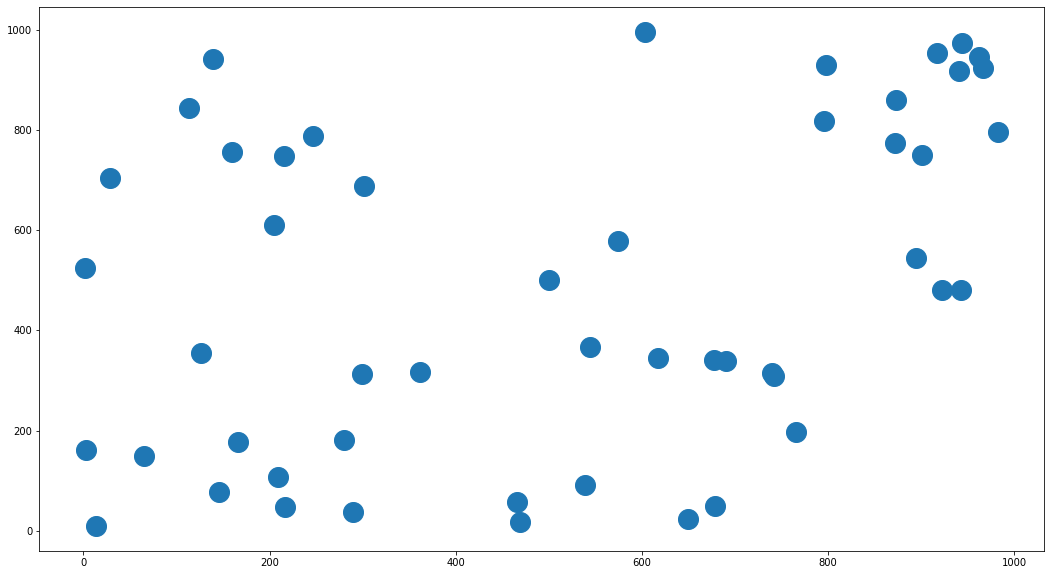

In [8]:
generateMap(villes, routes)

## Première approche :  hill-climbing
<br>
Cet algorithme heuristique permet une première approximation du resultat.

### Solution aléatoire :
Je commence par générer une solution aléatoire au problème. Ce n'est pas la plus optimale mais c'est un point de départ.

In [ ]:
def coutTournee(tournee):
    cout = []
    for i in range(len(tournee)):
        if (i < len(tournee)):
            cout.append(routes[tournee[i-1]][tournee[i]])
        else:
            cout.append(routes[tournee[i]][tournee[i+1]])
    return sum(cout)

In [ ]:
def randomSolution():
    listeVille = [i for i in range(len(villes[0]))]
    firstTournee = random.sample(listeVille[1:], n-1)
    firstTournee.insert(0, 0)
    firstTournee.append(0)
    return firstTournee

firstTournee = randomSolution()
print(firstTournee)
print(coutTournee(firstTournee))


In [ ]:
def printTournee(villes, tournee):
    plt.scatter(villes[0], villes[1],s=400)
    for i in range(len(tournee)-1) :
        plt.plot([villes[0][tournee[i]],villes[0][tournee[i+1]]], [villes[1][tournee[i]], villes[1][tournee[i+1]]], c='red')
    plt.gcf().set_size_inches(18, 10)
    plt.show()

In [ ]:
printTournee(villes, firstTournee)

In [ ]:
def voisinage(tournee):
    for k in range(1, len(tournee)-2):
        voisin = tournee.copy()
        i = voisin[k]
        voisin[k] = voisin[k+1]
        voisin[k+1] = i
        yield(voisin)

In [ ]:
def hill_climbing(solution_initiale):

    solution_courante = solution_initiale
    nouveau = True
    nb_iter = 0
    
    while (nouveau):
        nb_iter += 1
        meilleure_solution = solution_courante
        cout_meillieur = coutTournee(meilleure_solution)
        # on parcourt tous les voisins de la solution courante pour garder la meilleure
        for voisin in voisinage(solution_courante):
            cout_voisin = coutTournee(voisin)
            if cout_voisin < cout_meillieur:
                cout_meillieur = cout_voisin
                meilleure_solution = voisin
        nouveau = (meilleure_solution != solution_courante)
        solution_courante = meilleure_solution
    print("Nombre d'itération : %d" %nb_iter)
    
    return solution_courante

In [ ]:
print("optimisation locale")
solutionLocale = hill_climbing(firstTournee)
print(solutionLocale)
print('Coût : '+ str(coutTournee(solutionLocale)))
printTournee(villes, solutionLocale)

### Hill-climbing multi-start

In [ ]:
nb_iterations = 10

val_min = 0
for i in routes:
    val_min += sum(i)
print(val_min)
for _ in range(nb_iterations):
    tournee = randomSolution()
    sol_courante = hill_climbing(tournee)
    val_courante = coutTournee(sol_courante)
    print("Coût = %d" %(coutTournee(sol_courante)))
    if (val_courante < val_min):
        val_min = val_courante
        sol_min = sol_courante
print("\nTournée finale =" )
print(sol_min)
print('\n')
print("Coût=%d"% val_min)
printTournee(villes, sol_min)

## Approche méta-heuristique

### Listes tabou

In [ ]:
def recherche_tabou_graph(solution_initiale, taille_tabou, iter_max):
    nb_iter = 0
    liste_tabou = deque((), maxlen = taille_tabou)

    # variables solutions pour la recherche du voisin optimal non tabou
    solution_courante = solution_initiale
    meilleure = solution_initiale
    meilleure_globale = solution_initiale

    # variables valeurs  pour la recherche du voisin optimal non tabou
    valeur_meilleure = coutTournee(solution_initiale)
    valeur_meilleure_globale = valeur_meilleure

    # variables pour l'affichage
    meilleure_trouvee = 0
    meilleure_globale_trouvee = 0
    
    # liste des solutions courantes et des meilleures trouvées, pour afficher la trajectoire
    # l'élément à la ième position correspond à l'itération i
    courantes =\
        deque(())
    meilleures_courantes =\
        deque(())
    
    while (nb_iter < iter_max):
        nb_iter += 1
        valeur_meilleure = 0
        
        # on parcourt tous les voisins de la solution courante
        for voisin in voisinage(solution_courante):
            valeur_voisin = coutTournee(voisin)
            
            # meilleure solution non taboue trouvée
            if valeur_voisin < valeur_meilleure and voisin not in liste_tabou:
                meilleure_trouvee += 1
                valeur_meilleure = valeur_voisin
                meilleure = voisin
        
        # on met à jour la meilleure solution rencontrée depuis le début
        if valeur_meilleure < valeur_meilleure_globale:
            meilleure_globale_trouvee += 1
            meilleure_globale = meilleure
            valeur_meilleure_globale = valeur_meilleure
        
        meilleures_courantes.append(
            valeur_meilleure_globale)
        courantes.append(
                valeur_meilleure)
        
        # on passe au meilleur voisin non tabou trouvé
        solution_courante = meilleure
        
        # on met à jour la liste tabou
        liste_tabou.append(solution_courante)

    return meilleure_globale, courantes, meilleures_courantes
    

In [ ]:
def recherche_tabou(solution_initiale, taille_tabou, iter_max):
    nb_iter = 0                                                                
    liste_tabou = deque((), maxlen = taille_tabou)
    # variables solutions pour la recherche du voisin optimal non tabou
    solution_courante = solution_initiale
    meilleure = solution_initiale
    meilleure_globale = solution_initiale
    # variables valeurs pour la recherche du voisin optimal non tabou
    valeur_meilleure = coutTournee(solution_initiale)
    valeur_meilleure_globale = valeur_meilleure
    while (nb_iter < iter_max):
        valeur_meilleure = -1
        # on parcourt tous les voisins de la solution courante
        for voisin in voisinage(solution_courante):
            valeur_voisin=coutTournee(voisin)
            # MaJ meilleure solution non taboue trouvée
            if valeur_voisin < valeur_meilleure and voisin not in liste_tabou:
                valeur_meilleure = valeur_voisin
                meilleure = voisin
        # on met à jour la meilleure solution rencontrée depuis le début
        if valeur_meilleure < valeur_meilleure_globale:
            meilleure_globale = meilleure
            valeur_meilleure_globale = valeur_meilleure
            nb_iter = 0
        else:
            nb_iter += 1
        # on passe au meilleur voisin non tabou trouvé
        solution_courante = meilleure
        # on met à jour la liste tabou
        liste_tabou.append(solution_courante)
    return meilleure_globale

In [ ]:
iter_max = 300
taille_tabou = 5
tournee = randomSolution()
sol, courants, meilleurs_courants=recherche_tabou(tournee, taille_tabou, iter_max)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(iter_max), courants)
res = plt.plot(range(iter_max), meilleurs_courants)

In [ ]:
iter_max=300
taille_tabou=10

tournee = randomSolution()
sol=recherche_tabou(tournee, taille_tabou, iter_max)
print("valeur finale = " + str(coutTournee(sol)))

### tabou multi-start

In [ ]:
nb_iterations = 10
iter_max=500
taille_tabou=10

start = time.process_time()
val_min = 0
for i in routes:
    val_min += sum(i)
for _ in range(nb_iterations):
    tournee = randomSolution()
    sol_courante = recherche_tabou(tournee, taille_tabou, iter_max)
    val_courante = coutTournee(sol_courante)
    print("Coût = %d" %(coutTournee(sol_courante)))
    if (val_courante < val_min):
        val_min = val_courante
        sol_min = sol_courante
stop = time.process_time()
print("calculé en ", stop-start, 's')
print("\nTournée finale =" )
print(sol_min)
print('\n')
print("Coût=%d"% val_min)
printTournee(villes, sol_min)

## Algorithme génétique

### Fonction distance + définition du dictionnaire

In [9]:

def distance(n1,n2):
    dx = n2['posX'] - n1['posX']
    dy = n2['posY'] - n1['posY']
    return math.sqrt(dx * dx + dy * dy)




### Fitness => pour calculer le cout du trajet

In [10]:
def fitness(p):
    # calculating the first distance between the depot to the first node
    s = distance(vrp['nodes'][0], vrp['nodes'][p[0]])

    # calculating the distances between the nodes
    for i in range(len(p) - 1):
        prev = vrp['nodes'][p[i]]
        next = vrp['nodes'][p[i + 1]]
        s += distance(prev, next)

    # calculating the last distance between the last node to the depot
    s += distance(vrp['nodes'][p[len(p) - 1]], vrp['nodes'][0])
    return s


### Adjust

In [11]:
def adjust(p):
    # Adjust repeated
    repeated = True
    while repeated:
        repeated = False
        for i1 in range(len(p)):
            for i2 in range(i1):
                if p[i1] == p[i2]:
                    haveAll = True
                    for nodeId in range(len(vrp['nodes'])):
                        if nodeId not in p:
                            p[i1] = nodeId
                            haveAll = False
                            break
                    if haveAll:
                        del p[i1]
                    repeated = True
                if repeated: break
            if repeated: break
    # Adjust capacity exceed
    i = 0
    s = 0.0
    cap = vrp['capacity']
    while i < len(p):
        s += vrp['nodes'][p[i]]['demand']
        if s > cap:
            p.insert(i, 0)
            s = 0.0
        i += 1
    i = len(p) - 2
    # Adjust two consective depots
    while i >= 0:
        if p[i] == 0 and p[i + 1] == 0:
            del p[i]
        i -= 1

### Demande de la taille de la population et le nombre d'itérations

In [12]:
# popsize is the population size that specifies the number of individuals of each generation
# in the genetic algorithm
popsize = int(input("How much population ? "))

# iterations is a number that specifies the number of iterations of the genetic algorithm
iterations = int(input("How much iterations ? "))

How much population ? 10
How much iterations ? 10


### Début de l'algo génétique

In [13]:
pop = []

# generating random initial population
for i in range(popsize):
    p = list(range(1, len(vrp['nodes'])))
    random.shuffle(p)
    pop.append(p)
for p in pop:
    adjust(p)
    print(p)

# Starting the genetic algorithm
for i in range(iterations):
    nextPop = []
    # Each one of this iteration will generate two descendants individuals. Therefore, to guarantee same population size, this will iterate half population size times
    for j in range(int(len(pop) / 2)):
        # Selecting randomly 4 individuals to select 2 parents by a binary tournament
        parentIds = set()
        while len(parentIds) < 4:
            parentIds |= {random.randint(0, len(pop) - 1)}
        parentIds = list(parentIds)
        # Selecting 2 parents with the binary tournament
        parent1 = pop[parentIds[0]] if fitness(pop[parentIds[0]]) < fitness(pop[parentIds[1]]) else pop[parentIds[1]]
        parent2 = pop[parentIds[2]] if fitness(pop[parentIds[2]]) < fitness(pop[parentIds[3]]) else pop[parentIds[3]]
        # Selecting two random cutting points for crossover, with the same points (indexes) for both parents, based on the shortest parent
        cutIdx1, cutIdx2 = random.randint(1, min(len(parent1), len(parent2)) - 1), random.randint(1, min(len(parent1),
                                                                                                         len(parent2)) - 1)
        cutIdx1, cutIdx2 = min(cutIdx1, cutIdx2), max(cutIdx1, cutIdx2)
        # Doing crossover and generating two children
        child1 = parent1[:cutIdx1] + parent2[cutIdx1:cutIdx2] + parent1[cutIdx2:]
        child2 = parent2[:cutIdx1] + parent1[cutIdx1:cutIdx2] + parent2[cutIdx2:]
        nextPop += [child1, child2]
    # Doing mutation: swapping two positions in one of the individuals, with 1:15 probability
    if random.randint(1, 15) == 1:
        ptomutate = nextPop[random.randint(0, len(nextPop) - 1)]
        i1 = random.randint(0, len(ptomutate) - 1)
        i2 = random.randint(0, len(ptomutate) - 1)
        ptomutate[i1], ptomutate[i2] = ptomutate[i2], ptomutate[i1]
    # Adjusting individuals
    for p in nextPop:
        adjust(p)
    # Updating population generation
    pop = nextPop

# Selecting the best individual, which is the final solution
better = None
bf = float('inf')
for p in pop:
    f = fitness(p)
    if f < bf:
        bf = f
        better = p

[7, 0, 13, 0, 33, 2, 0, 16, 0, 39, 0, 10, 0, 5, 0, 8, 45, 0, 4, 23, 34, 0, 3, 0, 50, 11, 0, 20, 0, 15, 0, 6, 0, 28, 14, 0, 25, 0, 29, 9, 40, 41, 0, 26, 0, 42, 35, 0, 37, 0, 27, 0, 47, 0, 30, 0, 48, 21, 0, 44, 0, 49, 0, 31, 0, 1, 0, 38, 0, 12, 0, 22, 19, 0, 17, 32, 0, 18, 0, 43, 0, 46, 0, 36, 0, 24]
[35, 0, 26, 9, 0, 19, 24, 0, 10, 0, 21, 23, 28, 0, 30, 0, 17, 0, 22, 0, 1, 0, 27, 0, 50, 0, 8, 0, 25, 0, 48, 0, 44, 0, 37, 0, 34, 14, 45, 0, 46, 0, 7, 0, 16, 0, 6, 0, 33, 32, 0, 5, 0, 47, 0, 4, 0, 43, 0, 42, 31, 0, 3, 39, 0, 15, 0, 12, 0, 49, 0, 29, 0, 38, 11, 0, 13, 0, 2, 0, 18, 41, 0, 36, 0, 40, 20]
[39, 0, 6, 0, 16, 0, 40, 17, 0, 2, 45, 0, 42, 14, 0, 26, 0, 28, 8, 0, 47, 0, 15, 0, 36, 0, 43, 21, 0, 29, 0, 18, 0, 44, 0, 34, 4, 0, 13, 0, 1, 0, 46, 0, 12, 3, 0, 20, 0, 5, 0, 50, 0, 32, 31, 0, 25, 0, 11, 10, 0, 30, 0, 24, 0, 48, 0, 37, 0, 41, 0, 27, 0, 9, 23, 0, 49, 0, 38, 0, 22, 0, 33, 35, 19, 0, 7]
[7, 14, 0, 25, 0, 49, 0, 15, 0, 24, 0, 36, 0, 11, 6, 0, 22, 0, 12, 0, 46, 0, 35, 0, 13, 0, 44,

### Affichage de la meilleure solution

In [15]:
# Printing the solution
print('route:')
print('depot')
for nodeIdx in better:
    print(vrp['nodes'][nodeIdx]['label'])
print(' cost:')
print('%f' % bf)

route:
depot
18
depot
37
depot
19
26
depot
24
2
depot
28
depot
27
depot
30
depot
22
depot
32
8
depot
38
depot
10
depot
25
depot
4
depot
16
depot
35
5
depot
48
depot
17
depot
13
depot
1
depot
14
31
depot
7
23
21
depot
50
depot
29
33
depot
36
depot
40
20
9
41
depot
6
34
depot
44
depot
43
depot
47
depot
45
3
11
depot
49
depot
39
depot
15
depot
42
12
depot
46
 cost:
36246.643893
